In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os
from scipy.optimize import curve_fit
import B00_codes.dataReader as dr
import matplotlib.colors as colors
import math
import scipy
import pandas as pd

NO_MS_EQUALS_1 = 0
Q_FINAL = 1
THREE_PI_HALF_FINAL = 2
REF_MINUS_SIG  =3

Text(0.5, 1.0, 'Vz = 4.966V. z = 71.21 um')

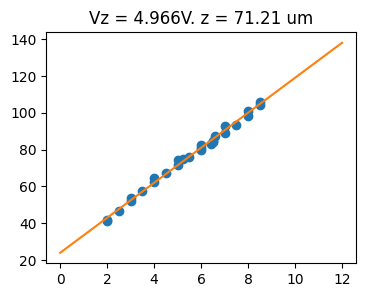

In [199]:
# zpiezo
input_v = 4.966 # type input Vz to be converted here
fig, ax = plt.subplots(figsize=(4,3))
x = (5.25, 6,    8.5,   6.411, 6.6,  6,    5.5,  5,    4.5,  4,    3.5,  3,    2.5,  2,  6.5,  7,    7.5,  8,    8.5,
     8,     7,    6,    5,  4,    3,    2,    6.5)
y = (74.6, 81.2, 105.9, 88.9,  84.4, 80.1, 76.1, 71.9, 67.3, 62.5, 57.5, 52.2, 46.7, 41, 82.5, 87.4, 92.9, 98.5, 104.3,
     101.2, 93.5, 84.7, 75, 64.5, 53.5, 41.6, 83)
x = np.sort(x); y = np.sort(y)
ax.plot(x,y,'o')

xfit, yfit, popt, perr = dr.fitLinear(x,y)
xfit = np.linspace(0,12,1001)
yfit = dr.linear(xfit, *popt)
ax.plot(xfit,yfit)

z = dr.linear(input_v, *popt)
ax.set_title("Vz = %.3fV. z = %.2f um" %(input_v, z))

In [ ]:
# Saturation rate
days = np.linspace(8,8,1)
dataArr = []; dataArrDark = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-06-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'counter' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 1 and idx <= 27:
                datafile = mainFolder + dataFolder +'/time_s_set.dat'
                x_s, sig = dr.readDataNoRef(datafile)
                sig = np.array(sig[0:-1])
                n = len(x_s)
                print("n = " + str(n) + "; Avg count rate = " + str(np.round(np.average(sig))))
                if idx <= 19: dataArr.append(np.round(np.average(sig)))
                else: dataArrDark.append(np.round(np.average(sig)))

[287.25720661 931.4971484 ]


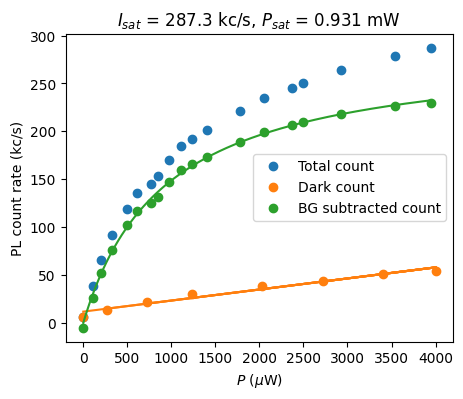

In [446]:
# r = 700e-9/2/2.6
# r = 150e-9 
# area = np.pi*r**2
# D1, shallow, before triacid
fig, ax = plt.subplots(figsize=(5,4))

x = np.array((767,844,978,1115,1230,1410,1783,2055,2370,
              2500,2930,3540,3950,613,497,329,206,106,0))
y = np.array(dataArr)

xd = np.array((0,264,723,1230,2030,2720,3400,4000))
yd = np.array(dataArrDark)

x = np.sort(x); y = np.sort(y/1000); xd = np.sort(xd); yd = np.sort(yd/1000)
popt, pcov = curve_fit(dr.linear, xd, yd)
perr = np.sqrt(np.diag(pcov))
xdfit = np.linspace(xd, xd[-1], 1001)
ydfit = dr.linear(xdfit, *popt)

yfit_few = dr.linear(x,*popt)
y_subtr = y-yfit_few

xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
plot3 = ax.plot(xdfit, ydfit,color='C1')
plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)

In [ ]:
# Saturation rate
days = np.linspace(28,28,1)
dataArr = []; dataArrDark = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-07-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'counter' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 73 and idx <= 102:
                datafile = mainFolder + dataFolder +'/time_s_set.dat'
                x_s, sig = dr.readDataNoRef(datafile)
                sig = np.array(sig[0:-1])
                n = len(x_s)
                print("n = " + str(n) + "; Avg count rate = " + str(np.round(np.average(sig))))
                if idx <= 94: dataArr.append(np.round(np.average(sig)))
                else: dataArrDark.append(np.round(np.average(sig)))

[  93.62039433 1683.05022189]


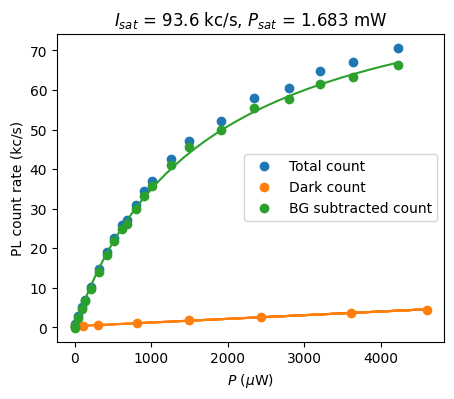

In [17]:
# D2, bulk
fig, ax = plt.subplots(figsize=(5,4))

x = np.array((4220,3630,3200,2800,2340,1910,1500,1260,1010,
              910, 800, 690, 620, 518, 423, 323, 214, 136, 97,  51,  11,  0))
y = np.array(dataArr)

xd = np.array((0,105,313,815,1490,2430,3610,4600))
yd = np.array(dataArrDark)

x = np.sort(x); y = np.sort(y/1000); xd = np.sort(xd); yd = np.sort(yd/1000)
popt, pcov = curve_fit(dr.linear, xd, yd)
perr = np.sqrt(np.diag(pcov))
xdfit = np.linspace(xd, xd[-1], 1001)
ydfit = dr.linear(xdfit, *popt)

yfit_few = dr.linear(x,*popt)
y_subtr = y-yfit_few

xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
plot3 = ax.plot(xdfit, ydfit,color='C1')
plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)

In [ ]:
# Saturation rate
days = np.linspace(5,5,1)
dataArr = []; dataArrDark = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-08-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'counter' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 23 and idx <= 42:
                datafile = mainFolder + dataFolder +'/time_s_set.dat'
                x_s, sig = dr.readDataNoRef(datafile)
                sig = np.array(sig[0:-1])
                n = len(x_s)
                print("n = " + str(n) + "; Avg count rate = " + str(np.round(np.average(sig))))
                if idx <= 36: dataArr.append(np.round(np.average(sig)))
                else: dataArrDark.append(np.round(np.average(sig)))

[170.8784894  878.56646391]


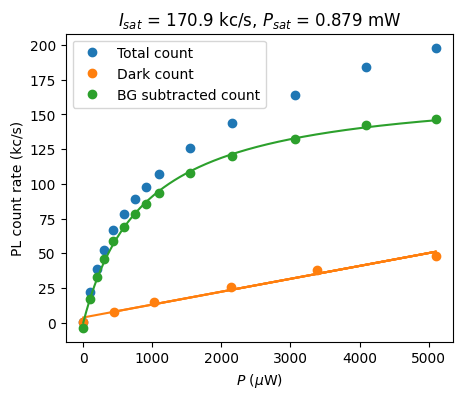

In [402]:
#D1, shallow, after triacid
fig, ax = plt.subplots(figsize=(5,4))

x = np.array((5100, 4100, 3070, 2150, 1540, 1100,
              910,  750,  595,  435,  303,  200, 100, 0))
y = np.array(dataArr)

xd = np.array((0,450,1020,2140,3380,5100))
yd = np.array(dataArrDark)

x = np.sort(x); y = np.sort(y/1000); xd = np.sort(xd); yd = np.sort(yd/1000)
popt, pcov = curve_fit(dr.linear, xd, yd)
perr = np.sqrt(np.diag(pcov))
xdfit = np.linspace(xd, xd[-1], 1001)
ydfit = dr.linear(xdfit, *popt)

yfit_few = dr.linear(x,*popt)
y_subtr = y-yfit_few

xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
plot3 = ax.plot(xdfit, ydfit,color='C1')
plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)

[ 254.2409128  4699.82220654]


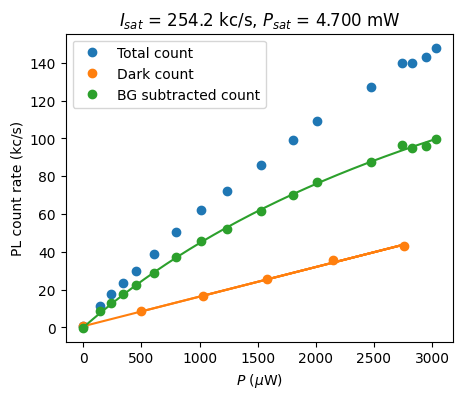

In [13]:
# D1 in conant
fig, ax = plt.subplots(figsize=(5,4))

x = np.array((2745, 2825, 2950, 3030, 2475, 2011, 1800, 1530, 1240,
              1010, 800,  610,  450,  340,  240,  140,  0))
y = np.array((140,  140,  143,  148,  127,  109,  99,   86,   72,
              62,   50.5, 39,   30,   23.5, 17.5, 11.5, 0.5))

xd = np.array((0,   500,  1030, 1580, 2150, 2760))
yd = np.array((0.5, 8.5,  16.5, 25.5, 35.5, 43))

x = np.sort(x); y = np.sort(y); xd = np.sort(xd); yd = np.sort(yd)
popt, pcov = curve_fit(dr.linear, xd, yd)
perr = np.sqrt(np.diag(pcov))
xdfit = np.linspace(xd, xd[-1], 1001)
ydfit = dr.linear(xdfit, *popt)

yfit_few = dr.linear(x,*popt)
y_subtr = y-yfit_few

xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
plot3 = ax.plot(xdfit, ydfit,color='C1')
plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)

In [ ]:
# Saturation rate
days = np.linspace(21,21,1)
dataArr = []; dataArrDark = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-08-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'counter' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 23 and idx <= 43:
                datafile = mainFolder + dataFolder +'/time_s_set.dat'
                x_s, sig = dr.readDataNoRef(datafile)
                sig = np.array(sig[0:-1])
                n = len(x_s)
                print("n = " + str(n) + "; Avg count rate = " + str(np.round(np.average(sig))))
                if idx <= 34 or idx >= 41: dataArr.append(np.round(np.average(sig)))
                else: dataArrDark.append(np.round(np.average(sig)))

[ 166.38527308 3740.75117573]


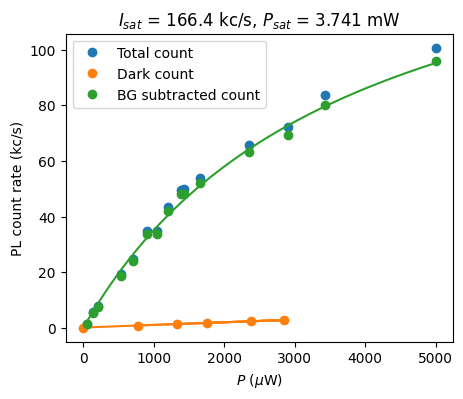

In [50]:
# D2, bulk
fig, ax = plt.subplots(figsize=(5,4))

x = np.array((1430,1200,900,1050,700,540,210,145,50,1650,2350,2900, 1390, 3430, 5000))
y = np.array(dataArr)

xd = np.array((2850,2380,1750,1330,770,0))
yd = np.array(dataArrDark)

x = np.sort(x); y = np.sort(y/1000); xd = np.sort(xd); yd = np.sort(yd/1000)
popt, pcov = curve_fit(dr.linear, xd, yd)
perr = np.sqrt(np.diag(pcov))
xdfit = np.linspace(xd, xd[-1], 1001)
ydfit = dr.linear(xdfit, *popt)

yfit_few = dr.linear(x,*popt)
y_subtr = y-yfit_few

xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
plot3 = ax.plot(xdfit, ydfit,color='C1')
plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)

In [ ]:
# Saturation rate
days = np.linspace(25,25,1)
dataArr = []; dataArrDark = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-08-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'counter' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 18 and idx <= 33:
                datafile = mainFolder + dataFolder +'/time_s_set.dat'
                x_s, sig = dr.readDataNoRef(datafile)
                sig = np.array(sig[0:-1])
                n = len(x_s)
                print("n = " + str(n) + "; Avg count rate = " + str(np.round(np.average(sig))))
                if idx <= 29: dataArr.append(np.round(np.average(sig)))
                else: dataArrDark.append(np.round(np.average(sig)))

[105.25598666 571.19283911]


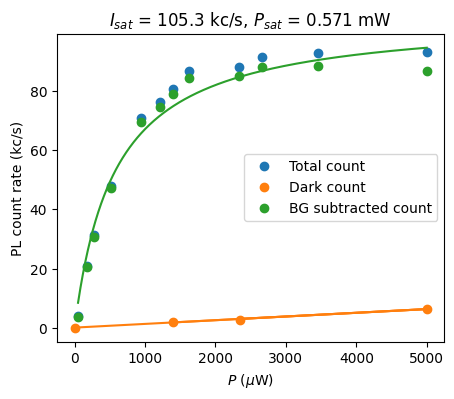

In [6]:
# D2, bulk
fig, ax = plt.subplots(figsize=(5,4))

x = np.array((1400,1220,950,520,280,180,50,1630,2340,2660,3460,5000))
y = np.array(dataArr)

xd = np.array((5000,2350,1400,0))
yd = np.array(dataArrDark)

x = np.sort(x); y = np.sort(y/1000); xd = np.sort(xd); yd = np.sort(yd/1000)
popt, pcov = curve_fit(dr.linear, xd, yd)
perr = np.sqrt(np.diag(pcov))
xdfit = np.linspace(xd, xd[-1], 1001)
ydfit = dr.linear(xdfit, *popt)

yfit_few = dr.linear(x,*popt)
y_subtr = y-yfit_few

xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
plot3 = ax.plot(xdfit, ydfit,color='C1')
plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)